# Central Limit Theorem and Confidence Intervals

In this section we explore an interesting mathematical phenomenon called the central limit theorem, where the normal distribution makes a surprising appearance when taking the means of samples. We will then leverage it for one practical application: confidence intervals. Along the way, we will also learn how to leverage the inverse CDF to find critical z-values.

For this section, let's bring in these dependencies. 

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

## Central Limit Theorem

Let's reuse a function below called `plot_central_limit_theorem()`. It is going to randomly generate a specified `sample_size` of numbers between 0 and 10 uniformly, meaning that any number is equally likely. There is also `sample_count` that will specify the number of samples. It will take the average value of each sample, and then plot those averages in a histogram. 

In [9]:
def plot_central_limit_theorem(sample_size, sample_count):
    # random numbers between 0.0 and 10
    X = [(sum([random.uniform(0.0, 10.0) for i in range(sample_size)]) / sample_size) \
                for _ in range(sample_count)]

    # plot histogram
    counts, bins = np.histogram(X)
    plt.stairs(counts, bins)
    plt.show()

Now let's say we get 50 samples, each with a size of 1. Notice how there's a predictable uniformity. 

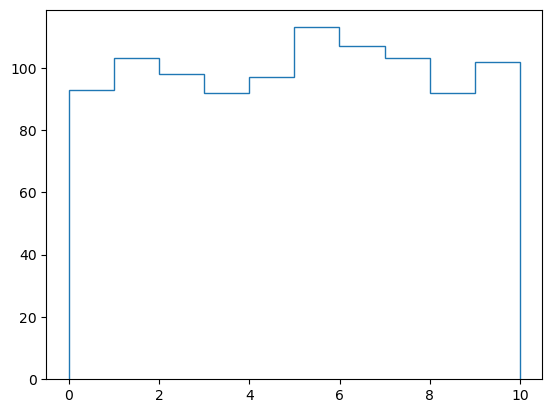

In [10]:
plot_central_limit_theorem(sample_size=1, sample_count=1000)

But as we make the sample size larger, something interesting happens. Here is 1000 samples where each size is 2. 

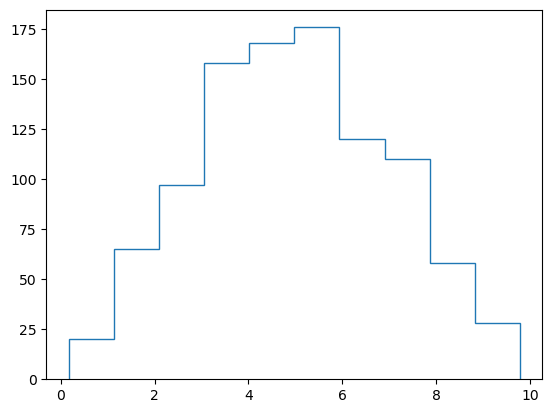

In [11]:
plot_central_limit_theorem(sample_size=2, sample_count=1000)

Here is another where the sample size is 31. Note how at a sample size of 31, we have converged on a normal distribution shape. 

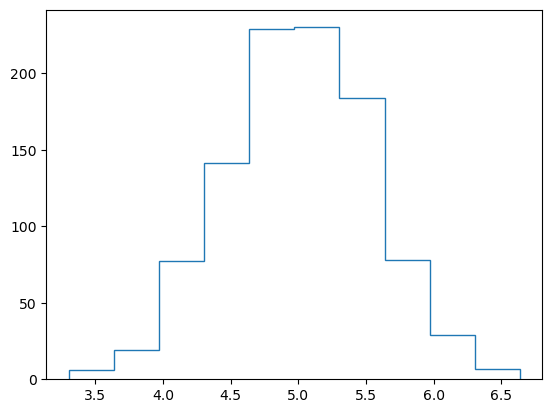

In [12]:
plot_central_limit_theorem(sample_size=31, sample_count=1000)

What we are discovering here is the **central limit theorem**, which states that interesting things happen when we start taking averages of samples, which start to form a normal distribution given large enough sample sizes. Here are the key points of the central limit theorem. 

* The mean of the sample means is equal to the population mean.
* If the population is normal, then the sample means will be normal.
* If the population is not normal, but the sample size is 31 or more, the sample means will still roughly form a normal distribution.
* The standard deviation of the sample means equals the population standard deviation divided by the square root of the sample size. 

$$
\Large{s = \frac{\sigma}{\sqrt{n}}}
$$

## Critical Z Values

Before we move on and apply the central limit theorem to confidence intervals, we need to cover one more concept. The **critical z-value** is a symmetrical middle range that provides a specific area under the bell curve. For example, let's say we want to find 95% of the center area under the bell curve below. What is the range of x-values that provide this? 

svg image

Of course, we need to use the inverse cumulative density function (the `ppf()` in SciPy) but we need to figure out which areas we need to look up deductively first. Let's hone in on the remaining area in the tails. Since the area under the entire curve is 1.0, that means there is .05 remaining in both tails collectively. 

svg image

That means each tail has .025 area. Therefore we would identify the x-value of the left tail at area .025. 

svg image

Let's just use a standard normal distribution with a mean of 0 and standard deviation of 1, and calculate this using SciPy. That left tail is cut off at $ x = -1.9599639845400545 $. 

In [13]:
mean=0
std=1
norm.ppf(.025,mean,std)

-1.9599639845400545

Now what is the x-value that cuts off the right tail? This is a bit trickier to deduct but think logically. That would be the .95 area in the center plus the .025 area in the left tail. That would mean looking up the x-value yielding area $ .975 $. 

svg image

Unsurprisingly, we get a symmetrical opposite x-value of $ 1.959963984540054 $ using the `ppf()` function.

In [14]:
norm.ppf(.975,mean,std)

1.959963984540054

So our z-value is as follows, which gives us the $ .95 $ area at the center of the curve. 

$$
Z = ±1.95996
$$

svg image

This concept of the Z-value is going to be critical for our next topic: confidence intervals. Let's package this calculation into a nice compact function that will accept a probability/area of $ p $. It will then chop up the remaining area in half and divide to each tail, and then look up the $ \pm Z $ value capturing that area. 

In [15]:
from math import sqrt
from scipy.stats import norm

def critical_z_value(p):
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    upper_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)

Then we can use this function to find a critcal Z-value for any desired area at the center of the curve. Here's how we calculate the 0.95 critical Z-Value using this function. 

In [16]:
critical_z_value(.95)

(-1.959963984540054, 1.959963984540054)

## Confidence Intervals

A **confidence interval** is a range calculation showing how confidently we believe a sample parameter (such as a mean) falls in a range for the population mean. 

Let's say I have a 3D printer and the filament (the plastic tubing that's fed and melted to print shapes from the nozzle) advertises a 1.75 mm diameter. Due to some mechanical issues, I am skeptical so I make 34 measurements as shown below with my caliper.  

In [18]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/hypothesis/filament_measurements.csv',header=None, names=['measurement'])
df

,measurement
0,1.73
1,1.73
2,1.73
3,1.75
4,1.72
5,1.69
6,1.76
7,1.69
8,1.70
9,1.67


For this technique you will want a sample size greater than 30, otherwise you will need to swap out a normal distribution for a T-Distribution which we will cover later. 

svg image

Let's also capture the mean and standard deviation.

In [19]:
mean = df.mean()[0]
std = df.std()[0]

print(f"MEAN: {mean}, STD: {std}")

MEAN: 1.7155882352941176, STD: 0.029252420409630185


In [20]:
from math import sqrt
from scipy.stats import norm


def critical_z_value(p):
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    upper_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)

critical_z_value(.95)

(-1.959963984540054, 1.959963984540054)

So I get $ \pm 1.95996 $ as my critical Z-value that captures 95% of the area in the bell curve. Next I need to translate this into the **margin of error (E)**, which is the range around the sample mean that contains that population mean with that level of confidence. 


$$
E = \pm Z_c\frac{s}{\sqrt{n}}
$$

$$
E = \pm 1.95996 \frac{0.02925}{\sqrt{34}} 
$$

$$
E = \pm 0.0098
$$
We can then add and subtract this margin of error from the mean. 

$$
\text{CI}_{0.95} = \bar{x} \pm E 
$$

$$
\text{CI}_{0.95} =  1.715588 \pm 0.0098
$$

We can package these calculations into a nice convenient function called `confidence_interval` that accepts a level of confidence  $ p $, the sample mean, the sample standard deviation, and the sample size $ n $. We will also print out each step for reference. 

In [21]:
def confidence_interval(p, sample_mean, sample_std, n):
    # Sample size must be greater than 30

    lower, upper = critical_z_value(p)
    print("CRITICAL Z VALUE: ", lower, upper)

    lower_moe = lower * (sample_std / sqrt(n))
    upper_moe = upper * (sample_std / sqrt(n))
    print("MARGIN OF ERROR: ", lower_moe, upper_moe)

    return sample_mean + lower_moe, sample_mean + upper_moe

ci = confidence_interval(p=.95, sample_mean=mean, sample_std=std, n=34)
print("CONFIDENCE INTERVAL: ", ci[0], ci[1])

CRITICAL Z VALUE:  -1.959963984540054 1.959963984540054
MARGIN OF ERROR:  -0.00983264679548873 0.00983264679548873
CONFIDENCE INTERVAL:  1.7057555884986288 1.7254208820896064


Take a moment to study that! What this means is that **given our sample measurements from our 3D printer filament, we are 95% confident the 3D printer filament diameter mean falls between 1.7057 and 1.7254 millimeters.** This statement in bold is what the confidence interval achieves, and given these measurements we are inclined to believe this filament is not 1.74 mm in diameter as advertised. 

> Granted, our caliper could be faulty and be biased to undermeasure. However, one would think that an instrument that pinches would overmeasure rather than undermeasure... unless the filament is getting pinched by the tool and therefore being compressed. 

## T-Distribution

There will be situations where you will have smaller sample (less than 31) but will have to make inferences about the population anyway. This is where the T-Distribution will come in handy. It looks just like the stanard normal distribution but it has an important difference. 

It has one argument called **degrees of freedom** (`df` in SciPy) that is typically assigned the sample size $ n $ minus 1. The smaller the sample size, the wider the T-distribution becomes. 

Below, if we have a sample size of 5, notice how much fatter the tails are in the T-Distribution as opposed to the standard normal distribution (orange).

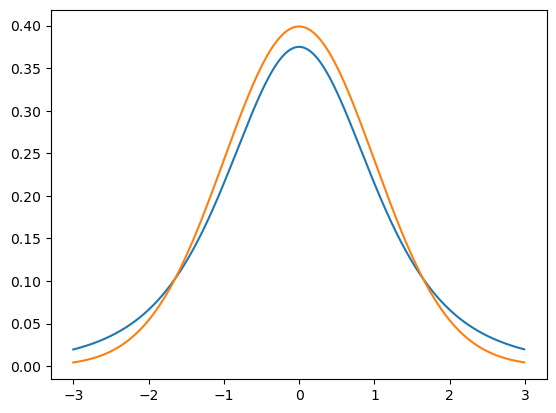

In [22]:
from scipy.stats import t, norm
import matplotlib.pyplot as plt

n = 5
x_range = np.arange(-3,3, .01) 

# Plot T-Distribution and Normal Distribution
plt.plot(x_range, t.pdf(x_range, df=n-1)) # T-distribution
plt.plot(x_range, norm.pdf(x_range, loc=0,scale=1)) # Standard Normal distribution

plt.show()

But if we make the sample size 31 or greater, notice how the T-distribution converges on the normal distribution. This is why mathematically 31 is a magic number in statistics because the sample size becomes large enough for the T-Distribution resembles the standard normal distribution. 

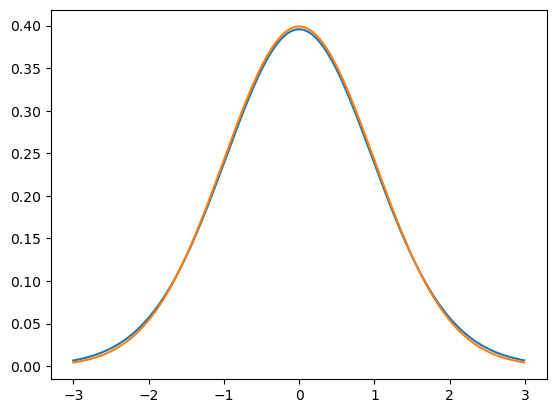

In [23]:
from scipy.stats import t, norm
import matplotlib.pyplot as plt

n = 31
x_range = np.arange(-3,3, .01) 

# Plot T-Distribution and Normal Distribution
plt.plot(x_range, t.pdf(x_range, df=n-1)) # T-distribution
plt.plot(x_range, norm.pdf(x_range, loc=0,scale=1)) # Standard Normal distribution

plt.show()

When doing confidence intervals and hypothesis testing (next section), you can swap out the normal distribution for the T-distribution when dealing with smaller samples that are less than 31 in size.

Below, we find the 95% critical value using the T-distribution instead of the normal distribution. 

In [24]:
from scipy.stats import t

# get critical value range for 95% confidence
# with a sample size of 25

n = 25
lower = t.ppf(.025, df=n-1)
upper = t.ppf(.975, df=n-1)

print(lower, upper)

-2.063898561628021 2.0638985616280205


## Exercise

Let's bring back our lightbulb lifespan dataset. There are 150 lightbulbs in the sample along with how many hours they lasted before burning out. As calculated below, the sample mean is 672.2 hours and the sample standard deviation is 51.48 hours. 

Based on this data, what is the 99% confidence interval for the mean of the lightbulb (for its entire population)? Complete the code below by replacing the question marks "?". 

In [ ]:
from math import sqrt
from scipy.stats import norm

df = pd.read_csv(r"https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/distribution/lightbulb_data.csv")

mean = df.mean()[0]
std = df.std()[0]
n = df.count()[0] 

print("COUNT: ", n, "MEAN: ", mean, " STD: ", std)

def critical_z_value(p):
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    upper_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(?), norm_dist.ppf(?)


def confidence_interval(p, sample_mean, sample_std, n):
    # Sample size must be greater than 30

    lower, upper = critical_z_value(p)
    print("CRITICAL Z VALUE: ", lower, upper)

    lower_moe = lower * (? / sqrt(?))
    upper_moe = upper * (? / sqrt(?))
    print("MARGIN OF ERROR: ", lower_moe, upper_moe)

    return ? + lower_moe, ? + upper_moe

ci = confidence_interval(p=?, sample_mean=mean, sample_std=std, n=n)
print("CONFIDENCE INTERVAL: ", ci[0], ci[1])

### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

The average lifespan of this lightbulb is between 661.3728 683.02717 with 99% confidence, as calculated below.

In [25]:
from math import sqrt
from scipy.stats import norm

df = pd.read_csv(r"https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/distribution/lightbulb_data.csv")

mean = df.mean()[0]
std = df.std()[0]
n = df.count()[0] 

print("COUNT: ", n, "MEAN: ", mean, " STD: ", std)

def critical_z_value(p):
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    upper_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)


def confidence_interval(p, sample_mean, sample_std, n):
    # Sample size must be greater than 30

    lower, upper = critical_z_value(p)
    print("CRITICAL Z VALUE: ", lower, upper)

    lower_moe = lower * (sample_std / sqrt(n))
    upper_moe = upper * (sample_std / sqrt(n))
    print("MARGIN OF ERROR: ", lower_moe, upper_moe)

    return sample_mean + lower_moe, sample_mean + upper_moe

ci = confidence_interval(p=.99, sample_mean=mean, sample_std=std, n=n)
print("CONFIDENCE INTERVAL: ", ci[0], ci[1])

COUNT:  150 MEAN:  672.2  STD:  51.48062775022316
CRITICAL Z VALUE:  -2.5758293035489004 2.5758293035489004
MARGIN OF ERROR:  -10.827178183930478 10.827178183930478
CONFIDENCE INTERVAL:  661.3728218160695 683.0271781839306
